### The Sparks Foundation Task-1 as part of Internship Work

### Problem Statement 
#### Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

This is a simple linear regression task as it involves just 2 variables.

What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt, seaborn as sns 
%matplotlib inline

### Reading the data

In [3]:
#reading the Application data
df=pd.read_csv(r"C:\Users\om\Desktop\DATA SCIENCE EVERYTHING\SPARK FOUNDATION INTERNSHIP\Spark Assignment 1 csv file.csv")
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Data Understanding

In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Checking the null values if any 
df.isnull().sum(axis=0)

Hours     0
Scores    0
dtype: int64

As per the above result we can say that there is no null values present in the data.

### Data Visualisation

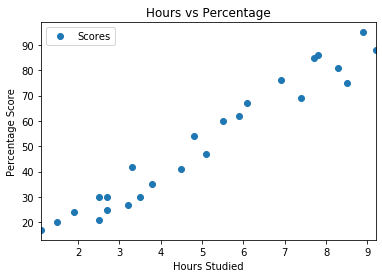

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph we can say clearly that there is positive correlation linearly between hpurs and scores. so we can analyse with ML Linear regression. 

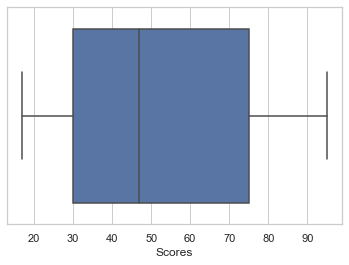

In [9]:
#Creating boxplot to check if any outlier is there in the dataset
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Scores"])

We can see clearly that there is no outlier available in the dataset.

### Preparation of data

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

### Model Building
Splitting the data into train and test to evaluate the metrics

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the algorithm

In [12]:
from sklearn.linear_model import LinearRegression  
lm= LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [13]:
### Printing the Parameters now
print(lm.intercept_)
print(lm.coef_)

2.018160041434683
[9.91065648]


So our linear regression model equation is as follow

Scores=2.01816+9.91*Hours

### Visualising the actual datapoints and visualising the fitted regression line 

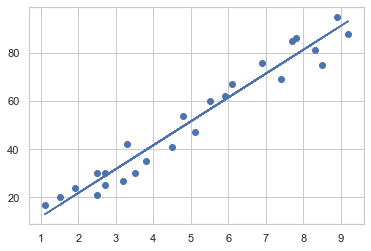

In [14]:
line=lm.coef_*X + lm.intercept_
#plotting for the test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Making prediction on train data


In [15]:
print(X_test)
y_pred=lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#compare actual vs predicted now 
df=pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


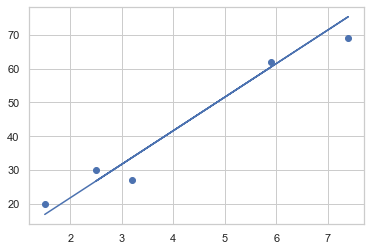

In [17]:
# Visualising fit on testset
line=lm.coef_*X_test+lm.intercept_
#plotting for the testdata
plt.scatter(X_test,y_test)
plt.plot(X_test,line)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [19]:
#RMSE AND MAE VALUE
print('Root mean squared error :' , np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))


Root mean squared error : 4.6474476121003665
Mean absolute error :  4.183859899002975


In [20]:
#checking the r-squared on the test set
r_squared = r2_score(y_test, y_pred)
print('r_squared :' ,  r_squared)

r_squared : 0.9454906892105356


In [21]:
# checking the adjusted r-squared on the test set
n=X_test.shape[0]     # n is number of rows in x_test
p=X_test.shape[1]      #p is number of features 

adjusted_r2=1-(1-r_squared)*(n-1)/(n-p-1)
print('Adjusted R-Squared : ', adjusted_r2)

Adjusted R-Squared :  0.9273209189473808


We can conclude that our model is best bcz of its r_squared value

In [26]:
lm.predict([[9.25]])

array([93.69173249])

### Conclusion
We can say that if a student study for 9.25 hours , he will score 93.69 %. 